<div align='center' style='font-family:"B Nazanin"'>
<h1> تکلیف سری دوم درس سیستم های چندرسانه ای </h1>
<h2> سارا برادران - شماره دانشجویی : 9624193 </h2>
</div>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def Show_Images(img_list, label, fig_size):
    
    img_num = len(img_list)
    if img_num == 1:
        plt.figure(figsize=fig_size) 
        plt.imshow(img_list[0], cmap="gray")
        plt.title("{}\n{}".format(label[0], img_list[0].shape[0:2]))
    
    else:
        fig, ax = plt.subplots(1, img_num, figsize=fig_size)
        for i in range(img_num):
            ax[i].imshow(img_list[i], cmap="gray")
            ax[i].set_title("{}\n{}".format(label[i], img_list[i].shape[0:2]))
        
    plt.show()

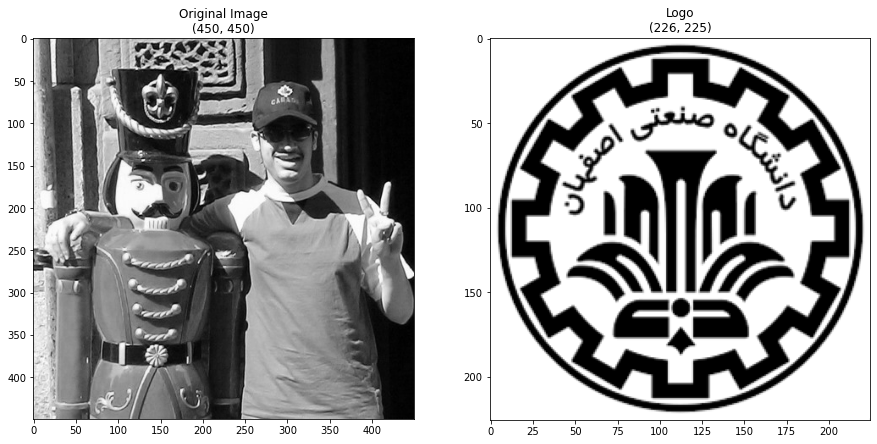

In [3]:
img_path = r'Pics\Hi.tif'
src_img = cv2.imread(img_path)
src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY)

img_path = r'Pics\iut.tif'
logo = cv2.imread(img_path)
logo = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)

Show_Images(img_list=[src_img, logo], 
            label=['Original Image', 'Logo'], 
            fig_size=(15,15))

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
سوال 1) فانکشنی به نام hist_cdf(image) بنویسید.
این فانکشن قرار است که هیستوگرام تصویر را رسم کند. اینکار را با ایجاد یک بردار h که 256 المان دارد انجام دهید. در هر المان از h تعداد پیکسل های متناظر با یکی کمتر از اندیس ثبت شده است. بردار از اندیس 1 تا 256 دارد ولی سطوح روشنایی از مقدار 0 تا 255 هستند. محتوای بردار h را با دستور plot نشان دهید. این فانکشن همچنین CDF تصویر ورودی را رسم می کند.
</span>
</h3>
 
</div>

In [4]:
def Hist_CDF(src_img):

    # Size of the image in pixels (size of original image)
    height, width = src_img.shape
    pdf = [0 for i in range(256)]
    
    for i in range(height):
        for j in range(width):
            pdf[src_img[i][j]] += 1
            

    # Show the histogram of image with matplotlib
    plt.figure(figsize=(15, 5)) 
    plt.bar(range(256), pdf, color = '#4842f5')
    plt.ylabel('Frequency', fontsize=15)
    plt.xlabel('Intensity levels', fontsize=15)
    plt.title('PDF', fontsize=15)
        
    # Show the cdf of image with matplotlib
    plt.figure(figsize=(15, 5))
    cdf = np.cumsum(pdf)
    s = sum(pdf)
    cdf = [i/s for i in cdf]
    plt.plot(cdf, color = '#4842f5')
    plt.ylabel('Cumulative probabilities', fontsize=15)
    plt.xlabel('Intensity levels', fontsize=15)
    plt.title('CDF', fontsize=15)
    plt.show()


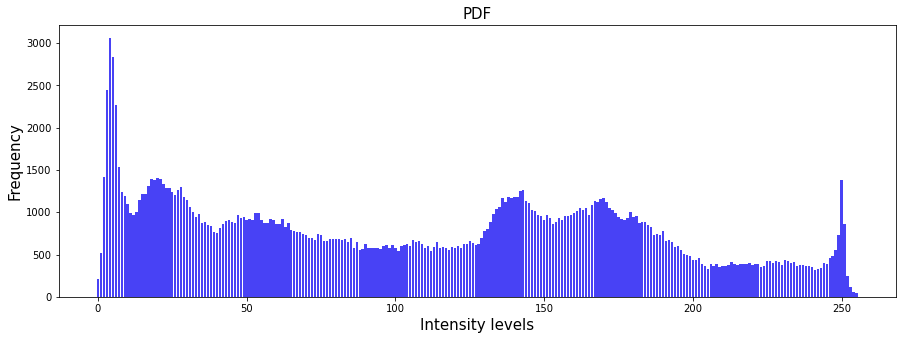

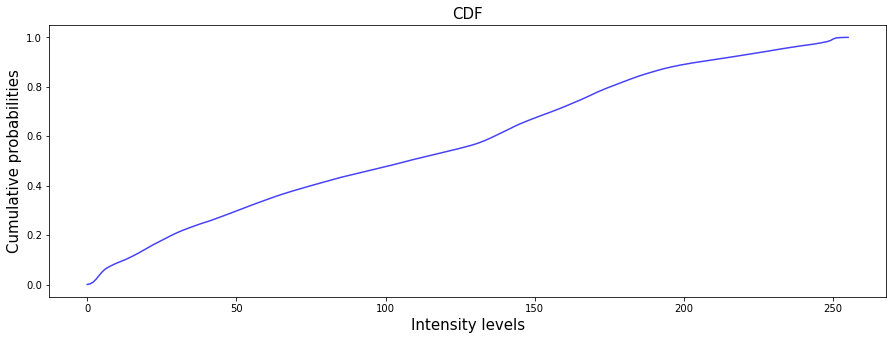

In [5]:
Hist_CDF(src_img)

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
سوال 2) فانکشنی بنویسید به نام hw2_histwq(image) که عمل histogram equalization را روی تصویر ورودی اجرا کند. برای اینکار مقدار CDF هر پیکسل را باید بدست بیاوریم که مقداری بین صفر و یک است. اگر تصویر از نوع uint8 است مقدار CDF را در 255 ضرب می کنیم و سطح روشنایی جدید بدست می آید. اگر تصویر اولیه با دستور im2double به فرمتی درآمده که پیکسل  های آن بین صفر و یک است آنگاه مقدار پیکسل تصویر جدید همان مقدار CDF خواهد بود. 
</span>
</h3>
 
</div>

In [6]:
def HW2_Histeq(src_img):

    # Size of the image in pixels (size of original image)
    height, width = src_img.shape
    new_img = [[0 for i in range(width)] for i in range(height)]
    
    pdf = [0 for i in range(256)]
    
    for i in range(height):
        for j in range(width):
            pdf[src_img[i][j]] += 1
            
    cdf = np.cumsum(pdf)
    s = sum(pdf)
    cdf = [i/s for i in cdf]
    
    for i in range(height):
        for j in range(width):
            new_img[i][j] = cdf[src_img[i][j]] * 255
            
    new_img = np.array(np.round(new_img))
    new_img = new_img.astype(np.uint8)

    return new_img

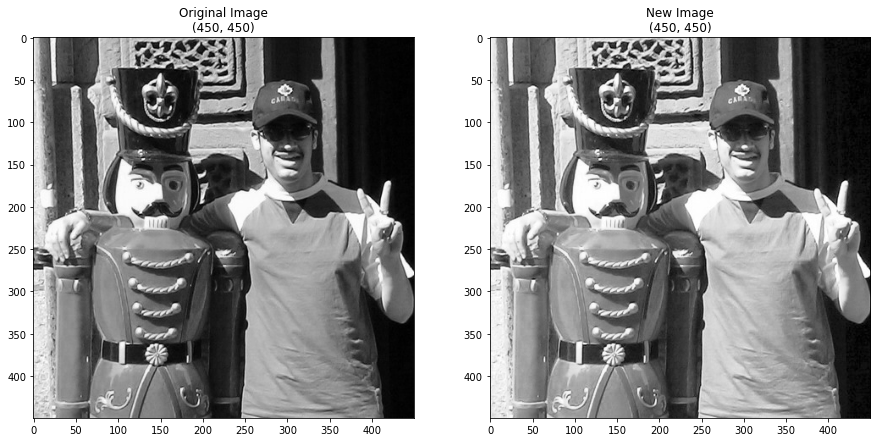

In [7]:
new_img = HW2_Histeq(src_img)

# Show the image with matplotlib
Show_Images(img_list=[src_img, new_img], 
        label=['Original Image', 'New Image'], 
        fig_size=(15,15))

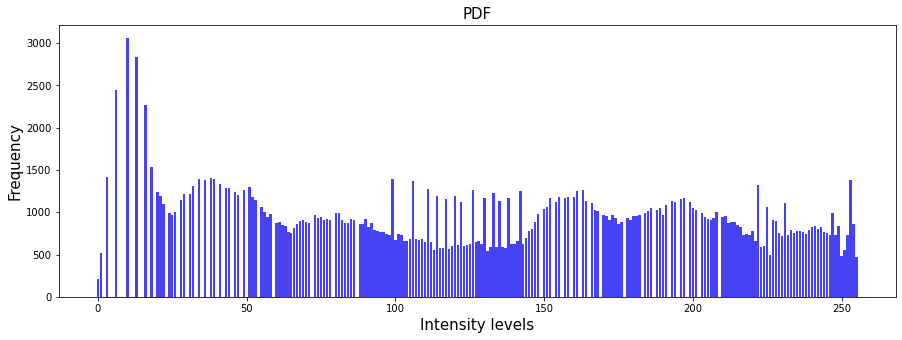

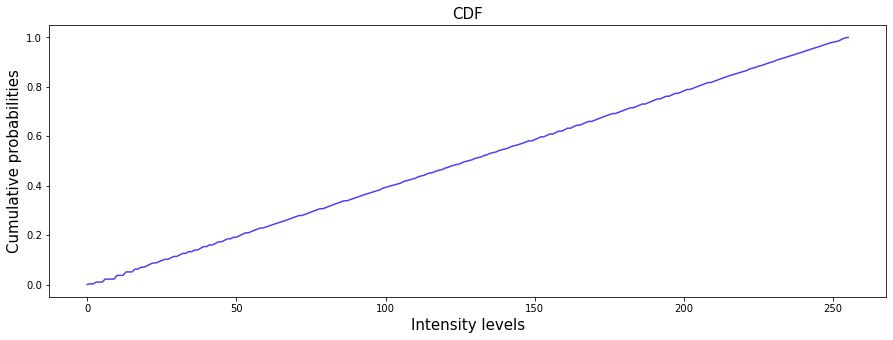

In [8]:
Hist_CDF(new_img)

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
سوال 3) فانکشنی بنویسید به نام hw2_local_histeq(image, n) که به صورت محلی روی بلوک های n در n تصویر تابع سوال 2 را اجرا می کند. تصویر ورودی اگر قابل تقسیم به n نیست می توانید از padding استفاده کنید ولی در نهایت تصویر خروجی باید هم اندازه تصویر ورودی باشد.
</span>
</h3>
 
</div>

In [9]:
def Padding(src_img, pixel):
    
    # Size of the image in pixels (size of original image)
    height, width = src_img.shape
    new_img = [[0 for i in range(width + pixel)] for i in range(height + pixel)]
    
    for i in range(height):
        for j in range(width):
            new_img[i][j] = src_img[i][j]
    
    new_img = np.array(new_img)
    return new_img

In [10]:
def HW2_Local_Histeq(src_img, n):
    
    # Size of the image in pixels (size of original image)
    src_height, src_width = src_img.shape
    
    if src_height % n != 0:
        src_img = Padding(src_img, n-(src_height % n))

    height, width = src_img.shape
    new_img = [[0 for i in range(width)] for i in range(height)]

    for i in range(0, height, n):
        for j in range(0, width, n):
            h = HW2_Histeq(src_img[i:i+n, j:j+n])
            for k in range(i,i+n):
                for l in range(j, j+n):
                    new_img[k][l] = h[k-i][l-j]
    
    new_img = np.array(new_img)
    
    if src_height % n != 0:
        new_img = new_img[:height-(n-(src_height % n)), :width-(n-(src_height % n))]
        
    return new_img      

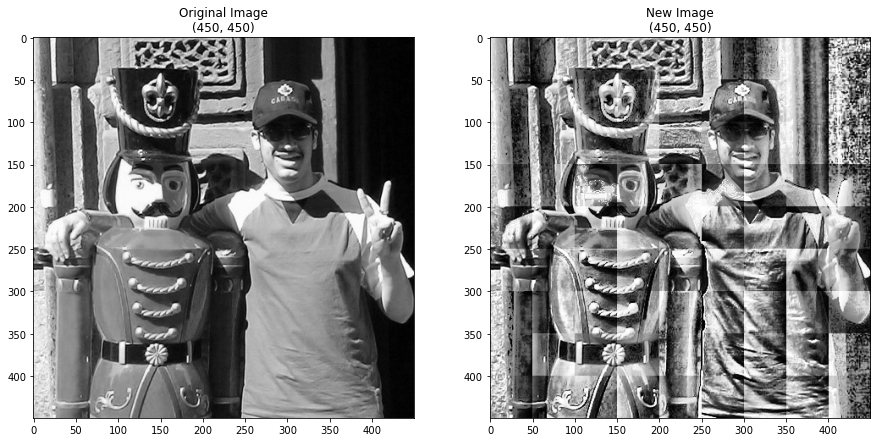

In [11]:
new_img = HW2_Local_Histeq(src_img, n=50)

# Show the image with matplotlib
Show_Images(img_list=[src_img, new_img], 
        label=['Original Image', 'New Image'], 
        fig_size=(15,15))

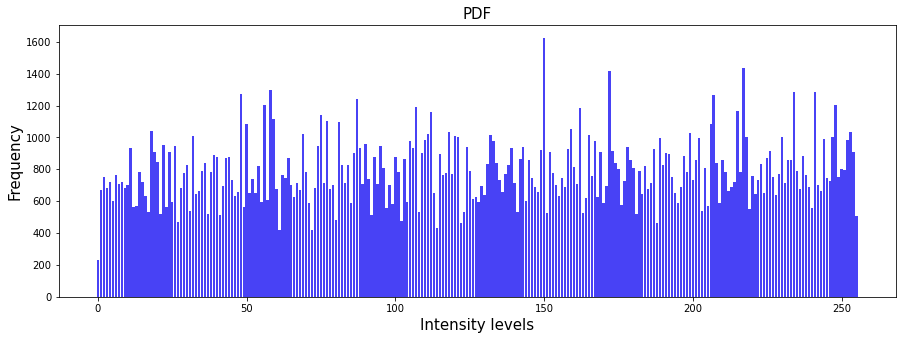

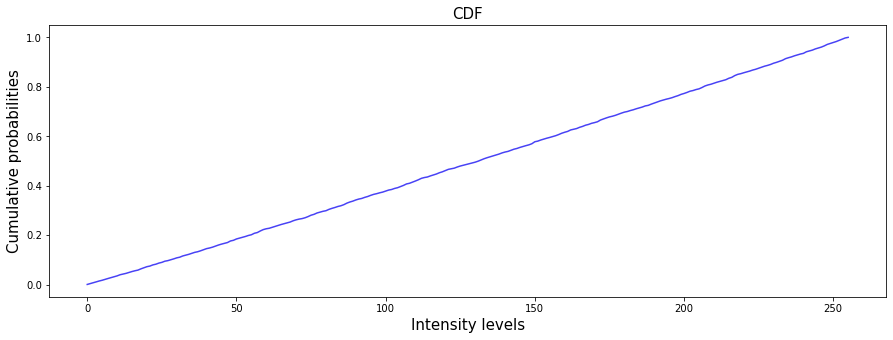

In [12]:
Hist_CDF(new_img)

<div style="direction:rtl;", align="justify" ><h3>
<span style='font-family:"B Nazanin"'>
سوال 4) فانکشنی بنویسید به نام hw2_hide(image, logo, L) که تصویر این تکلیف را دریافت کند و در لایه L این تصویر پیام تصویر iut.tif را جاسازی کند. برای اینکار باید تصویر iut.tif را به اندازه تصویر پوشانه شود که اینکار را با دستور imresize انجام دهید. سپس تصویر iut.tif را یک بیتی کنید و با استفاده از دستور bitset در پوشانه قرار دهید. سپس تصویر اصلی و واترمارک شده را نمایش دهید و مقدار MSE آنها را نشان دهید.
</span>
</h3>
 
</div>

In [13]:
def Make_Onebit(src_img):
    
    # Size of the image in pixels (size of original image)
    height, width = src_img.shape
    
    new_img = src_img.copy()
    new_img = new_img.astype(int)

    for i in range(height):
        for j in range(width):
            old_pixel = new_img[i][j]
            new_pixel = 0 if old_pixel <= 127 else 255
            new_img[i][j] = new_pixel
            
            error = old_pixel - new_pixel 
            
            if j != (width - 1):
                new_val = new_img[i][j + 1] + (7 * error / 16)
                new_img[i][j + 1] = new_val if new_val < 255 else 255
                
            if i != (height - 1):
                new_val = new_img[i + 1][j] + (5 * error / 16)
                new_img[i + 1][j] = new_val if new_val < 255 else 255
            
            if i != (height - 1) and j != 0:
                new_val = new_img[i+1][j-1] + (3 * error / 16)
                new_img[i+1][j-1] = new_val if new_val < 255 else 255
                
            if i != (height - 1) and j != width - 1:
                new_val = new_img[i+1][j+1] + (1 * error / 16)
                new_img[i+1][j+1] = new_val if new_val < 255 else 255
                
    new_img = new_img.astype(np.uint8)

    return new_img

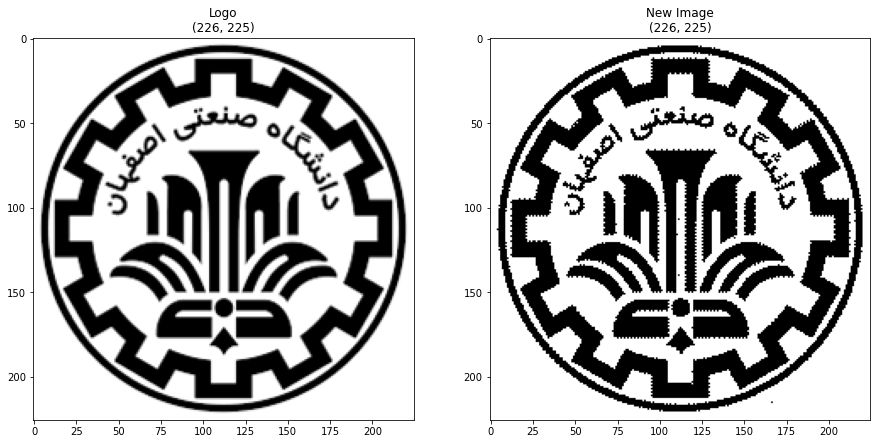

In [14]:
new_img = Make_Onebit(logo)
    
# Show the image with matplotlib
Show_Images(img_list=[logo, new_img], 
        label=['Logo', 'New Image'], 
        fig_size=(15,15))

In [15]:
def HW2_MSE(imageA, imageB):
    
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    mse = (np.square(imageA.astype(int) - imageB.astype(int))).mean()

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return mse

In [16]:
def HW2_Hide(src_image, logo, L):

    # Size of the image in pixels (size of original image)
    height, width = src_img.shape
    new_img = [[0 for i in range(width)] for i in range(height)]

    dim = (height, width)
    
    # Resize logo
    resized_logo = cv2.resize(logo, dim, interpolation = cv2.INTER_CUBIC)
    
    onebit_logo = Make_Onebit(resized_logo)
    
    for i in range(height):
        for j in range(width):
            pix_arr = np.array([src_image[i][j]], dtype = np.uint8)
            bit_arr = np.unpackbits(pix_arr)
            bit_arr[8-L] = 1 if onebit_logo[i][j] == 255 else 0
            new_img[i][j] = np.packbits(bit_arr)[0]
            
    new_img = np.array(new_img)
    return new_img        

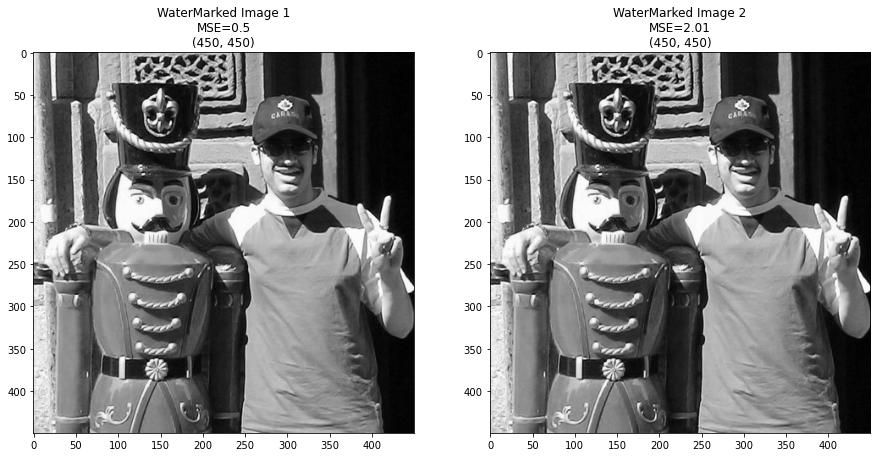

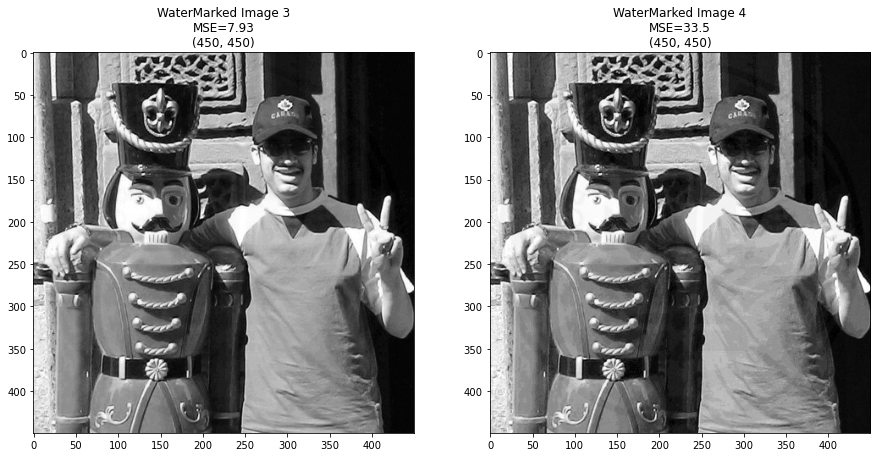

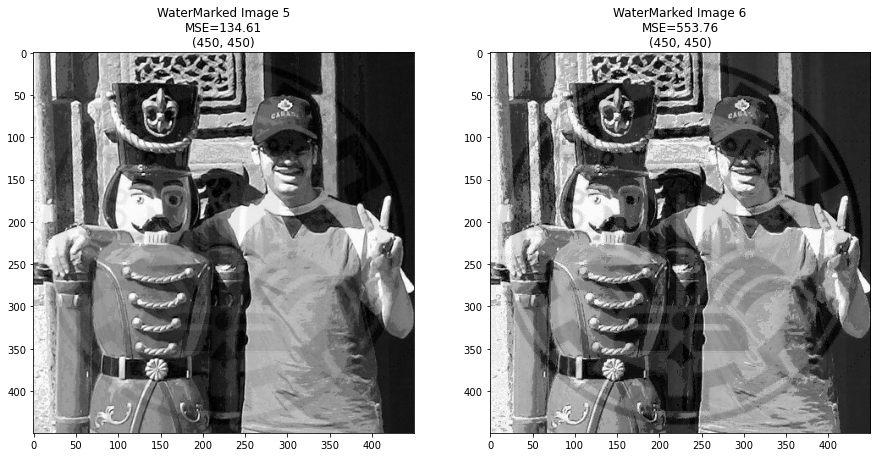

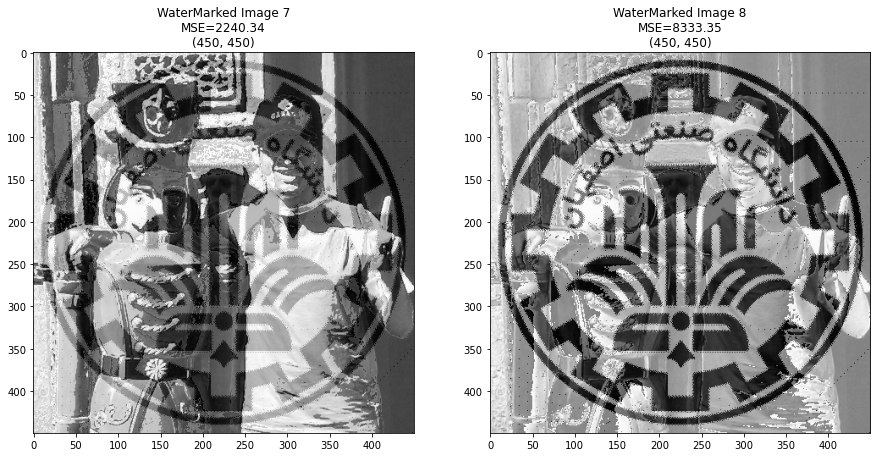

In [17]:
new_img = [0 for i in range(0,9)]
MSE_val = [0 for i in range(0,9)]

for i in range(1, 9, 2):
    new_img[i] = HW2_Hide(src_img, logo, L=i)
    MSE_val[i] = np.round(HW2_MSE(new_img[i], src_img), 2)
    new_img[i+1] = HW2_Hide(src_img, logo, L=i+1)
    MSE_val[i+1] = np.round(HW2_MSE(new_img[i+1], src_img), 2)
    # Show the image with matplotlib
    Show_Images(img_list=[new_img[i], new_img[i+1]], 
            label=['WaterMarked Image ' + str(i) + '\nMSE=' + str(MSE_val[i]),
                   'WaterMarked Image ' + str(i+1) + '\nMSE=' + str(MSE_val[i+1])], 
            fig_size=(15,15))